In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [319]:
birth = pd.read_csv("Births2015.csv", index_col = 'date', parse_dates= True)

In [320]:
birth

,Unnamed: 0,births,wday,year,month,day_of_year,day_of_month,day_of_week
date,,,,,,,,
2015-01-01,1,8068,Thu,2015,1,1,1,5
2015-01-02,2,10850,Fri,2015,1,2,2,6
2015-01-03,3,8328,Sat,2015,1,3,3,7
2015-01-04,4,7065,Sun,2015,1,4,4,1
2015-01-05,5,11892,Mon,2015,1,5,5,2
...,...,...,...,...,...,...,...,...
2015-12-27,361,7518,Sun,2015,12,361,27,1
2015-12-28,362,13100,Mon,2015,12,362,28,2
2015-12-29,363,13458,Tue,2015,12,363,29,3


In [321]:
 birth = birth.drop(['Unnamed: 0', 'wday', 'year',	'month',	'day_of_year',	'day_of_month',	'day_of_week'], axis=1)

In [322]:
birth 

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892
...,...
2015-12-27,7518
2015-12-28,13100
2015-12-29,13458


<AxesSubplot:xlabel='date'>

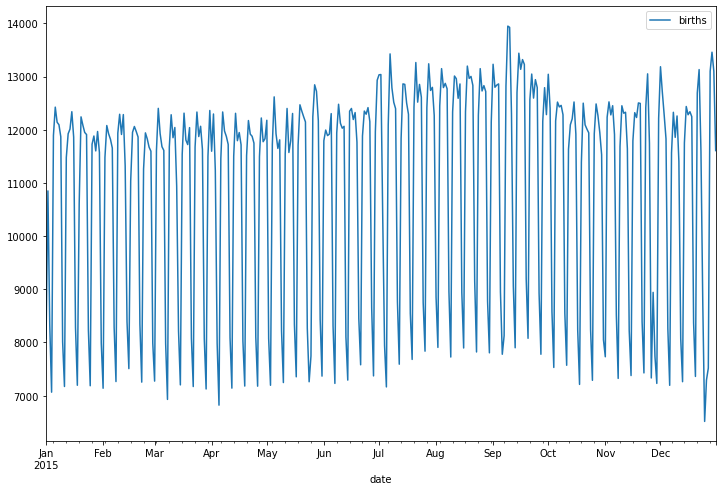

In [323]:
birth.plot(figsize=(12,8))

<AxesSubplot:xlabel='date'>

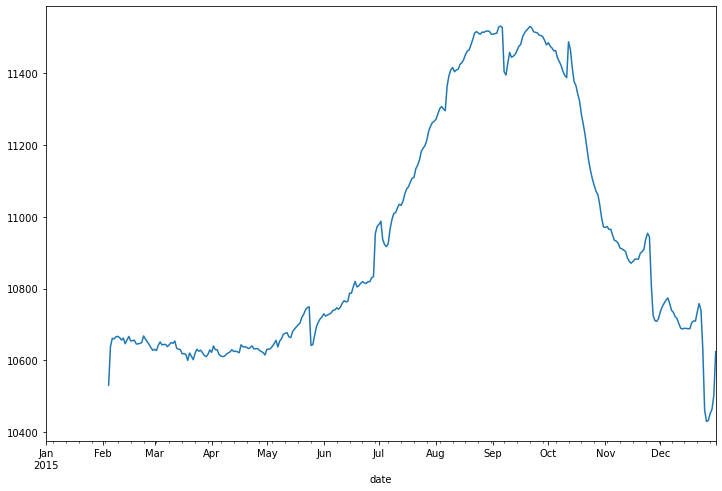

In [324]:
# Since the trend is not clear in the graph above we perform rolling to clearly see the pattern
birth['window_35'] =  birth.rolling(window = 35).mean()
birth.window_35.plot(figsize = (12,8))


In [325]:
# let's create base line nodel and see the predicted value
# for this we use simple moving average
birth['baseline'] = birth['births'].shift(1)
birth

,births,window_35,baseline
date,,,
2015-01-01,8068,NaN,NaN
2015-01-02,10850,NaN,8068.0
2015-01-03,8328,NaN,10850.0
2015-01-04,7065,NaN,8328.0
2015-01-05,11892,NaN,7065.0
...,...,...,...
2015-12-27,7518,10432.085714,7294.0
2015-12-28,13100,10451.542857,7518.0
2015-12-29,13458,10463.171429,13100.0


In [326]:
from sklearn.metrics import mean_squared_error
birth_error = mean_squared_error(birth.births[1:], birth.baseline[1:])


In [327]:
np.sqrt(birth_error)

2272.092334594498

In [328]:
# Arima method
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

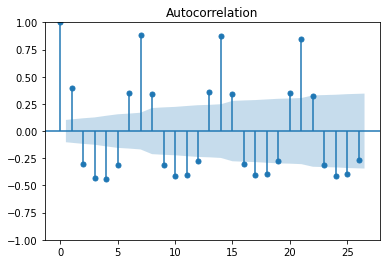

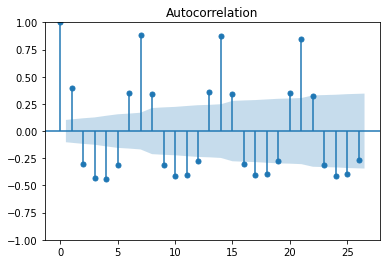

In [329]:
plot_acf(birth.births)

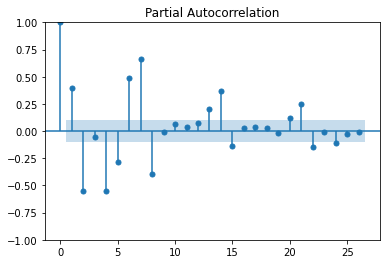

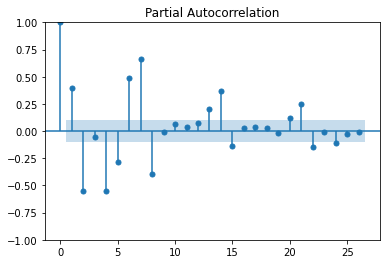

In [330]:
plot_pacf(birth.births)

In [331]:
# p = 3, q = 16, d=0
birth_train = birth.births[0:330]
birth_test = birth.births[330:365]

In [332]:
birth_train

date
2015-01-01     8068
2015-01-02    10850
2015-01-03     8328
2015-01-04     7065
2015-01-05    11892
              ...  
2015-11-22     7427
2015-11-23    12419
2015-11-24    13051
2015-11-25    11745
2015-11-26     7332
Name: births, Length: 330, dtype: int64

In [333]:
birth_test.size

35

In [334]:
import statsmodels.api as sm

In [335]:
birth_model = sm.tsa.arima.ARIMA(birth_train, order= (3,0,16))
result = birth_model.fit()

In [336]:
result.aic

5575.704391449541

In [337]:
forecast = result.forecast(steps = 35)

In [338]:
forecast

2015-11-27    11063.338563
2015-11-28    10721.575657
2015-11-29     7769.635976
2015-11-30     9520.691540
2015-12-01    13413.568053
2015-12-02    14473.604079
2015-12-03     9486.153999
2015-12-04     9280.097788
2015-12-05    10043.913454
2015-12-06     8949.124180
2015-12-07     9375.034853
2015-12-08    11630.595443
2015-12-09    13971.070441
2015-12-10    11911.492609
2015-12-11    10069.364058
2015-12-12     9191.998646
2015-12-13     9343.257337
2015-12-14    10940.537628
2015-12-15    12293.235807
2015-12-16    12822.721499
2015-12-17    11738.630462
2015-12-18    10220.075143
2015-12-19     9087.272571
2015-12-20     9482.719134
2015-12-21    10838.757136
2015-12-22    12370.893646
2015-12-23    12710.434291
2015-12-24    11802.103187
2015-12-25    10157.265862
2015-12-26     9175.204407
2015-12-27     9447.373147
2015-12-28    10894.622811
2015-12-29    12306.155268
2015-12-30    12727.444584
2015-12-31    11749.242430
Freq: D, Name: predicted_mean, dtype: float64

In [339]:
np.sqrt(mean_squared_error(birth_test,forecast))

1805.3980224000463

In [340]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 births   No. Observations:                  330
Model:                ARIMA(3, 0, 16)   Log Likelihood               -2766.852
Date:                Fri, 28 Oct 2022   AIC                           5575.704
Time:                        15:20:49   BIC                           5655.485
Sample:                    01-01-2015   HQIC                          5607.528
                         - 11-26-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.093e+04    310.419     35.208      0.000    1.03e+04    1.15e+04
ar.L1          0.3400      0.592      0.574      0.566      -0.821       1.501
ar.L2          0.1288      0.734      0.176      0.861      -1.309       1.567
ar.L3         -0.9005      0.587     -1.533      0.125      -2.052       0.251
ma.L1         -0.1234      0.634     -0.194      0.846      -1.367       1.120
ma.L2         -0.5651      0.616     -0.917      0.359      -1.773       0.643
ma.L3          1.0029      0.346      2.903      0.004       0.326       1.680
ma.L4          0.6256      0.527      1.187      0.235      -0.408       1.659
ma.L5         -0.5320      0.384     -1.384      0.166      -1.285       0.221
ma.L6         -0.3707      0.509     -0.728      0.467      -1.368       0.627
ma.L7          1.0133      0.456      2.222      0.026       0.120       1.907
ma.L8          0.1459      0.651      0.224      0.823      -1.130       1.422
ma.L9         -0.7032      0.645     -1.090      0.276      -1.968       0.562
ma.L10         0.4149      0.468      0.887      0.375      -0.502       1.331
ma.L11         0.6049      0.527      1.148      0.251      -0.428       1.638
ma.L12        -0.0861      0.427     -0.202      0.840      -0.923       0.751
ma.L13        -0.3555      0.458     -0.777      0.437      -1.253       0.542
ma.L14         0.3377      0.353      0.956      0.339      -0.355       1.030
ma.L15         0.2233      0.336      0.664      0.507      -0.436       0.883
ma.L16        -0.2583      0.336     -0.768      0.443      -0.918       0.401
sigma2       2.31e+06      0.046   5.01e+07      0.000    2.31e+06    2.31e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               489.47
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                            -0.58
Prob(H) (two-sided):                  0.06   Kurtosis:                         8.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.27e+23. Standard errors may be unstable.
"""

Applying Dickey fuller test to see whether the series is stationary.

In [341]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [342]:
adf_test(birth.births)

ADF Statistics: -1.6013993617475994
p- value: 0.48289048606661
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Let's use differencing to make series stationary.

In [343]:
birth['First_Difference']= birth['births']- birth['births'].shift(1)

In [344]:
birth['First_Difference']

date
2015-01-01       NaN
2015-01-02    2782.0
2015-01-03   -2522.0
2015-01-04   -1263.0
2015-01-05    4827.0
               ...  
2015-12-27     224.0
2015-12-28    5582.0
2015-12-29     358.0
2015-12-30    -358.0
2015-12-31   -1492.0
Name: First_Difference, Length: 365, dtype: float64

In [345]:
birth['Second_Difference']= birth['births']- birth['births'].shift(2)
adf_test(birth.Second_Difference[2:])

ADF Statistics: -9.164836251436755
p- value: 2.4767443498307263e-15
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


As, we can see our p-value >= 0.05, that means our data became stationary and our differencing(d) is 1.

In [346]:
birth_error1 = mean_squared_error(birth.births[1:], birth.First_Difference[1:])
birth_error2 = mean_squared_error(birth.births[2:], birth.Second_Difference[2:])
print(f'Birth error1: {np.sqrt(birth_error1)}')
print(f'Birth error2: {np.sqrt(birth_error2)}')

Birth error1: 11094.082069972023
Birth error2: 11088.054915783336


# For First Differencing 

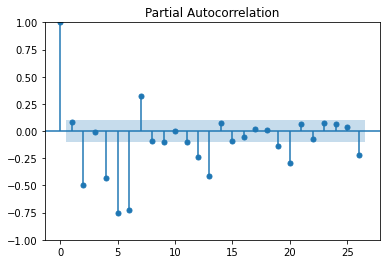

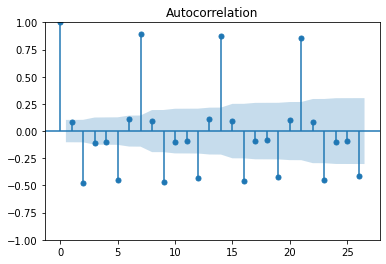

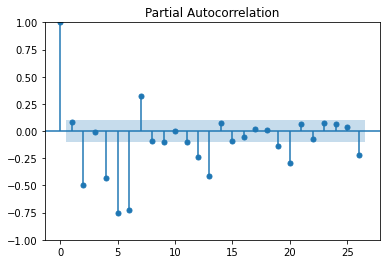

In [347]:
plot_acf(birth.First_Difference.dropna())
plot_pacf(birth.First_Difference.dropna())

In [348]:
# p = 1, q = 1, d=1 (for 1st differencing)
birth_train1 = birth.First_Difference[1:330]
birth_test1 = birth.First_Difference[330:]

In [349]:
birth_model1 = sm.tsa.arima.ARIMA(birth_train1, order= (1,1,16))
result1 = birth_model1.fit()
print(result1.aic)
forecast1 = result.forecast(steps = birth_test1.size )
#np.sqrt(mean_squared_error(birth_test1,forecast1))

5907.218128218767


# For Second Differencing

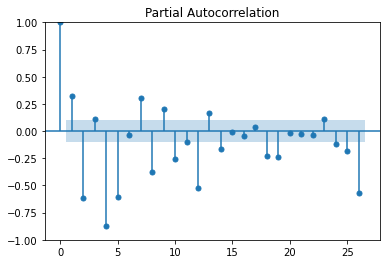

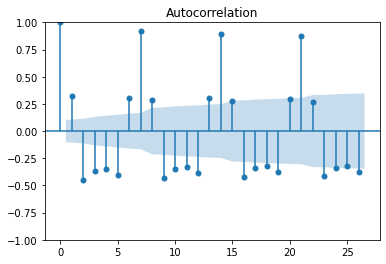

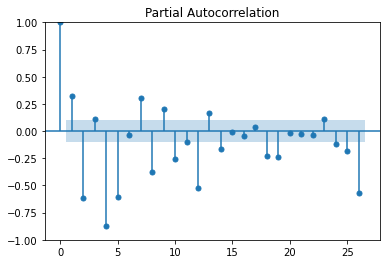

In [350]:
plot_acf(birth.Second_Difference.dropna())
plot_pacf(birth.Second_Difference.dropna())

In [351]:
# p = 3, q = 16, d=2 (for 2nd differencing)
birth_train2 = birth.Second_Difference[2:330]
birth_test2 = birth.Second_Difference[330:]

In [352]:
birth_model2 = sm.tsa.arima.ARIMA(birth_train2, order= (3,2,15))
result2 = birth_model2.fit()
print(result2.aic)
forecast2 = result.forecast(steps = birth_test2.size )
#np.sqrt(mean_squared_error(birth_test2,forecast2))

5911.4778880882295


In [353]:
birth_test = pd.DataFrame(birth_test)

In [354]:
birth_test['forecast'] =  result.forecast(steps = 35)
birth_test['forecast_1'] = result1.forecast(steps =birth_test1.size)
birth_test['forecast_2']=result2.forecast(steps = birth_test2.size)

In [355]:
birth_test.head()

,births,forecast,forecast_1,forecast_2
date,,,,
2015-11-27,8942,11063.338563,1407.278947,-4462.027721
2015-11-28,7734,10721.575657,247.238492,-3498.874299
2015-11-29,7230,7769.635976,-64.965905,-1975.719803
2015-11-30,12214,9520.691540,2875.288738,6052.554981
2015-12-01,13185,13413.568053,1670.566755,6324.439590


<AxesSubplot:xlabel='date'>

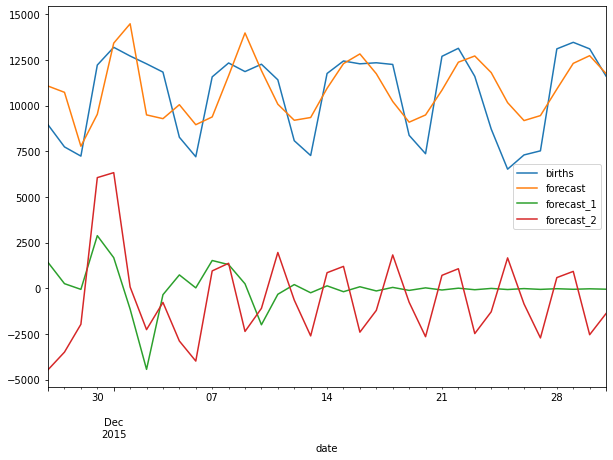

In [356]:
birth_test[['births','forecast', 'forecast_1', 'forecast_2']].plot(figsize = (10,7))